SICA Time Comparison- Additional Tests - Only Compatible with Attempt 2- Only for Time Complexity Calculations for Attempt 2- Only GPU

Part 1: Dataset Generation

Step 1: Import relevant state functions and packages

In [5]:
from cax_sica.genetic.state import CurrentState as st2

import numpy as np
import jax.numpy as jnp
import time
from typing import List, Tuple

Part 2: Testing Dim/Num Timesteps against Time Required for SICA Simulation: Trial 1: Dim Testing

In [6]:
#Requires about 35 minutes of runtime.
data: List[Tuple] = []
iter = 11
def generateicsrt(dim, num_steps, example = 0):
    ic = np.random.choice([0,0,0,1], size=(dim, dim))
    srt = np.random.choice([0,0,0,0,0,1], size=(num_steps, dim, dim, 18))
    return ic, srt
for i in range(100, 510, 5):
    print(f"OPERATING DIM: {i}")
    for _ in range(iter):
        print(f"ITER {_}")
        stepdim = [i,100,0]
        icsrt = generateicsrt(stepdim[0], stepdim[1])
        ic = icsrt[0]
        srt = icsrt[1]
        time_init = time.time()
        state = st2(initial=ic, rules=srt)
        st2res = state.generate()
        data.append((i,time.time()-time_init))




OPERATING DIM: 100
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING DIM: 105
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING DIM: 110
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10


KeyboardInterrupt: 

Trial 2: Timestep Testing


In [ ]:
#Requires about 40 minutes of runtime.
data_time: List[Tuple] = []
iter = 11
def generateicsrt(dim, num_steps, example = 0):
    ic = np.random.choice([0,0,0,1], size=(dim, dim))
    srt = np.random.choice([0,0,0,0,0,1], size=(num_steps, dim, dim, 18))
    return ic, srt
for i in range(100, 510, 5):
    print(f"OPERATING TIMESTEP CT: {i}")
    for _ in range(iter):
        print(f"ITER {_}")
        stepdim = [200,i,0]
        icsrt = generateicsrt(stepdim[0], stepdim[1])
        ic = icsrt[0]
        srt = icsrt[1]
        time_init = time.time()
        state = st2(initial=ic, rules=srt)
        st2res = state.generate()
        data_time.append((i,time.time()-time_init))




OPERATING TIMESTEP CT: 100
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 105
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 110
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 115
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 120
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 125
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 130
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 135
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 140
ITER 0
ITER 1
ITER 2
ITER 3
ITER 4
ITER 5
ITER 6
ITER 7
ITER 8
ITER 9
ITER 10
OPERATING TIMESTEP CT: 145
ITER 0
ITER 1
ITER 2
ITER 3


Step 3: Report results (Optional, used for data export)

In [ ]:
print(data)
print(data_time)

[(100, 4.799818754196167), (100, 0.03973841667175293), (100, 0.05132317543029785), (100, 0.039737701416015625), (100, 0.04261064529418945), (100, 0.0416872501373291), (100, 0.04203224182128906), (100, 0.04027986526489258), (100, 0.04085493087768555), (100, 0.0414118766784668), (100, 0.043073177337646484), (105, 0.8501522541046143), (105, 0.04579472541809082), (105, 0.06205272674560547), (105, 0.051891326904296875), (105, 0.05010080337524414), (105, 0.043389320373535156), (105, 0.051892757415771484), (105, 0.04250764846801758), (105, 0.043747663497924805), (105, 0.0487515926361084), (105, 0.0438840389251709), (110, 0.8548140525817871), (110, 0.04440498352050781), (110, 0.04735422134399414), (110, 0.049104928970336914), (110, 0.05034160614013672), (110, 0.0487062931060791), (110, 0.043891191482543945), (110, 0.051346540451049805), (110, 0.05034518241882324), (110, 0.04639768600463867), (110, 0.047760725021362305), (115, 0.8639259338378906), (115, 0.047548532485961914), (115, 0.0483591556

Part 2: Data Analysis and Plotting

Step 1: Import relevant functions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from results500gpu import data, data_time

Step 2: Generate plot arrays

In [11]:
#Adjust these values to be 810 - number of outliers.

dim_x = np.zeros((820))
dim_y = np.zeros((820))
step_x = np.zeros((820))
step_y = np.zeros((820))

#Remove first trials as they are outliers, as well as trial-specific outliers (dim: > 5.5s, step: > 2s)
dim_out = 0
step_out = 0
for i in range(0, len(data)):
    if (i%11):
        if (data[i][1] < 55):
            dim_x[i-1-int(np.floor(i/11)) - dim_out] = data[i][0]
            dim_y[i-1-int(np.floor(i/11)) - dim_out] = data[i][1]
        else:
            dim_out += 1
for i in range(0, len(data_time)):
    if (i%11):
        if (data_time[i][1] < 22):
            step_x[i-1-int(np.floor(i/11)) - step_out] = data_time[i][0]
            step_y[i-1-int(np.floor(i/11)) - step_out] = data_time[i][1]
        else:
            step_out += 1


Step 3: Perform test regressions (target: dim: quadratic; timestep: linear) and plot; evaluate using R²

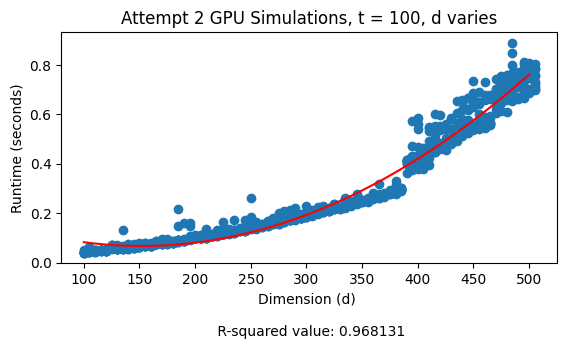

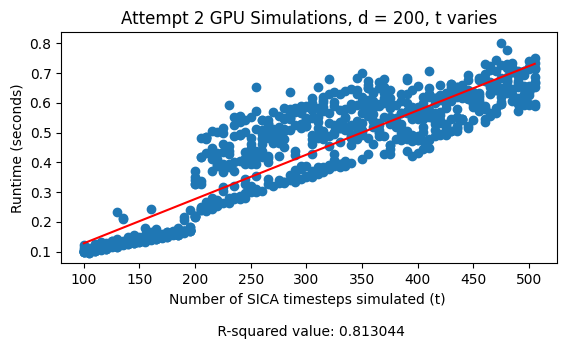

In [12]:
dim = stats.linregress(dim_x, dim_y)
step = stats.linregress(step_x, step_y)

"""Dim plots."""
#O(n²) fit
dimn2 = np.poly1d(np.polyfit(dim_x, dim_y, 2))
pdimn2 = np.linspace(100, 500, 1000)
plt.figure().set_figheight(3)
plt.plot(dim_x, dim_y, 'o')
plt.plot(pdimn2, dimn2(pdimn2), 'r')
plt.xlabel(f"Dimension (d) \n\n R-squared value: {r2_score(dim_y, dimn2(dim_x)):.6f}")
plt.ylabel("Runtime (seconds)")
plt.title("Attempt 2 GPU Simulations, t = 100, d varies")
plt.show()

"""Timestep plots."""
#O(n) fit
plt.figure().set_figheight(3)
plt.plot(step_x, step_y, 'o', label='original data')
plt.plot(step_x, step.intercept + step.slope*step_x, 'r')
plt.xlabel(f"Number of SICA timesteps simulated (t) \n\n R-squared value: {step.rvalue**2:.6f}")
plt.ylabel("Runtime (seconds)")
plt.title("Attempt 2 GPU Simulations, d = 200, t varies")
plt.show()